In [1]:
import pandas as pd

raw=pd.read_csv("./dist/H28-no-disc.csv", index_col=0)
raw

,id1,text1,id2,text2,id3,text3,id4,text4,id5,text5
index,,,,,,,,,,
1,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-01,医学・医療の歴史的な流れとその意味を概説できる。
2,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-02,臨床倫理や生と死に関わる倫理的問題を概説できる。
3,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-03,ヒポクラテスの誓い、ジュネーブ宣言、医師の職業倫理指針、医師憲章等医療の倫理に関する規範を概...
4,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-02,患者中心の視点,A-01-02-na,なし,A-01-02-na-01,リスボン宣言等に示された患者の基本的権利を説明できる。
5,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-02,患者中心の視点,A-01-02-na,なし,A-01-02-na-02,患者の自己決定権の意義を説明できる。
...,...,...,...,...,...,...,...,...,...,...
2002,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-01,シミュレータを用いて反復練習をすることで、臨床技能を磨く。
2003,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-02,模擬患者の協力を得て、臨床技能（コミュニケーションスキルを含む）や医療者に求められる態度を身...
2004,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-03,シナリオを用いたトレーニングを通して、状況判断、意思決定能力を獲得する。


In [2]:
import spacy
import ginza

nlp = spacy.load("ja_ginza_electra")

def extract_verb(text:str)->str:
  doc = nlp(text)
  return str(ginza.bunsetu_spans(doc)[-1]).replace("。","")

raw["verb"]=raw["text5"].map(extract_verb)
verb_count=raw.loc[:,["verb","id1"]].groupby(["verb"]).count().reset_index().sort_values("id1",ascending=False)
verb_count.columns=["verb","count"]
verb_count["percent"]=verb_count["count"]/verb_count["count"].sum()*100
verb_count.to_csv("./dist/H28_verb.csv",encoding="utf_8_sig",index=False)
verb_count


Cannot find the requested files in the cached path and outgoing traffic has been disabled. To enable model look-ups and downloads online, set 'local_files_only' to False.
trying to download model from huggingface hub: megagonlabs/transformers-ud-japanese-electra-base-ginza-510 ...


Downloading:   0%|          | 0.00/815 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414M [00:00<?, ?B/s]

succeded
/opt/conda/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


,verb,count,percent
359,説明できる,872,43.469591
206,概説できる,294,14.656032
13,できる,47,2.342971
83,列挙できる,44,2.193420
135,実施できる,28,1.395813
...,...,...,...
157,循環血液量減少性：熱傷,1,0.049850
156,循環血液量減少性：急性消化管出血,1,0.049850
155,循環血液量減少性：大動脈瘤破裂,1,0.049850
154,循環器：急性心筋梗塞,1,0.049850


Matplotlib is building the font cache; this may take a moment.


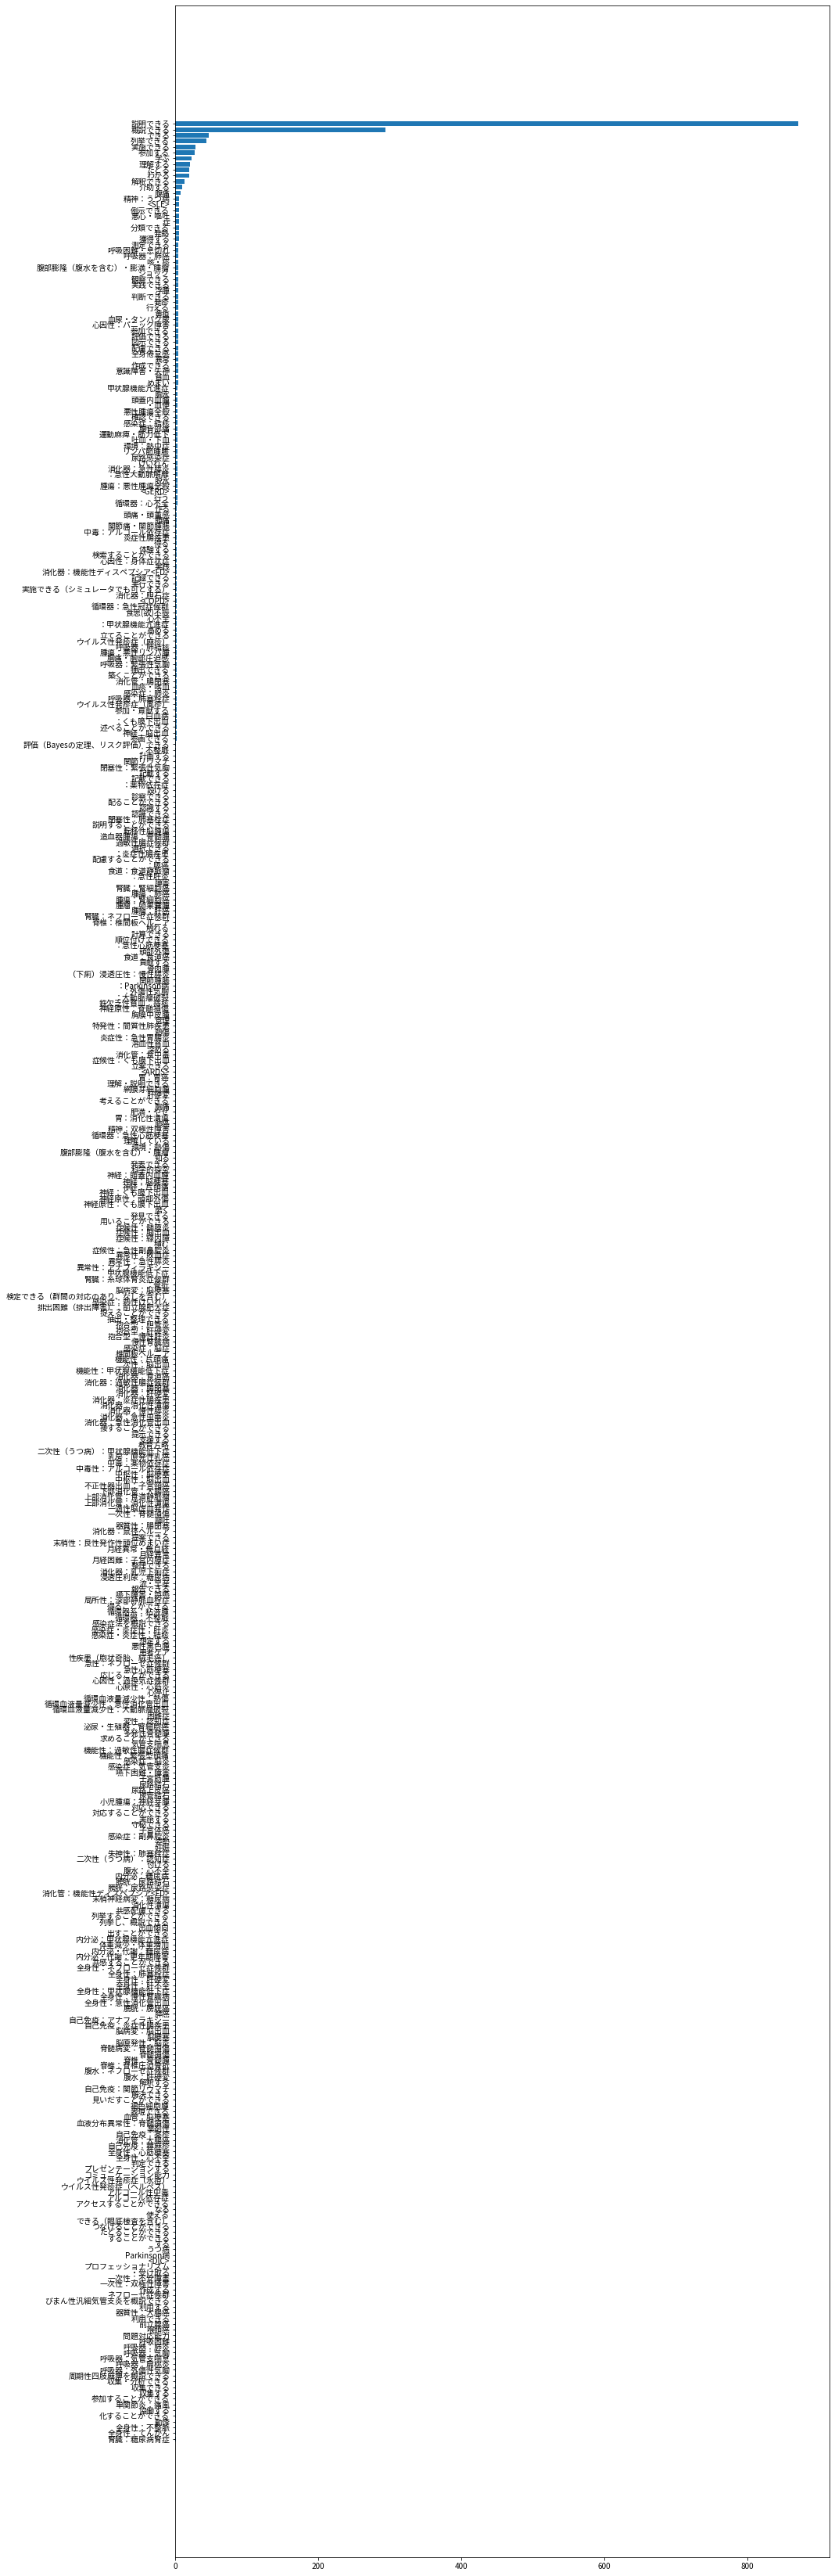

'/home/jovyan/.cache/matplotlib'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Noto Sans CJK JP']

verb_data=verb_count.sort_values(["count"])
fig,ax = plt.subplots(figsize=(15,60))
fig.patch.set_facecolor('w') 
ax.barh(verb_data["verb"],verb_data["count"])
plt.show()
mpl.get_cachedir()
